<table align="center" width=100%>
    <tr>
        <td width="15%">
            <img src="homework.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Take-Home <br>(Day 2)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

### About the dataset (Types of Flower Data)

The dataset contains the information of the three different species of the iris flower. The dataset contains values of four features (sepal length, sepal width, petal length, and petal width) of each flower and the species of iris.

Attribute Information:

**sepal length:** Sepal length of a flower in cm

**sepal width:** Sepal width of a flower in cm

**petal length:** Petal length of a flower in cm

**petal width:** Petal width of a flower in cm

**class:** Species of the iris flower

#### Import the required libraries

In [1]:
# import numpy
import numpy as np

# import pandas
import pandas as pd

# import matplotlib.pyplot
import matplotlib.pyplot as plt

# import seaborn
import seaborn as sns

# to suppress the warnings
import warnings
warnings.filterwarnings('ignore')

#### Load the flower_types dataset and print the first five observations

In [2]:
# load the csv file
df_iris = pd.read_csv('flower_types.csv')

# display the first five observations
df_iris.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### Let's begin with some hands-on practice exercises

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. Create two dummy variables for the unique categories of flower species</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [3]:
# retrieve the unique categories in 'class'
df_iris['class'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

Here, the class is divided into 3 different categories. Create 2 dummy variables for 3 categories.

In [4]:
# 'get_dummies' is pandas function to create dummy variables
# 'drop_first = True' creates (n-1) variables from 'n' categories
pd.get_dummies(df_iris['class'], drop_first = True).head()

,versicolor,virginica
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


The zero value in both the columns represents that the flower is of remaining species (setosa). 

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. Count the flowers whose sepal width is not known </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [5]:
# isnull() returns 'True' if there is a missing value
# sum() returns the total number of missing values
df_iris['sepal width'].isnull().sum()

0

The output shows that all the flowers in the data set have a record of sepal width.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. Is the variable 'sepal length' skewed? If yes, suggest the appropriate transformation to reduce the skewness
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [6]:
# calculate the coefficient of skewness 
df_iris['sepal length'].skew()

0.3149109566369728

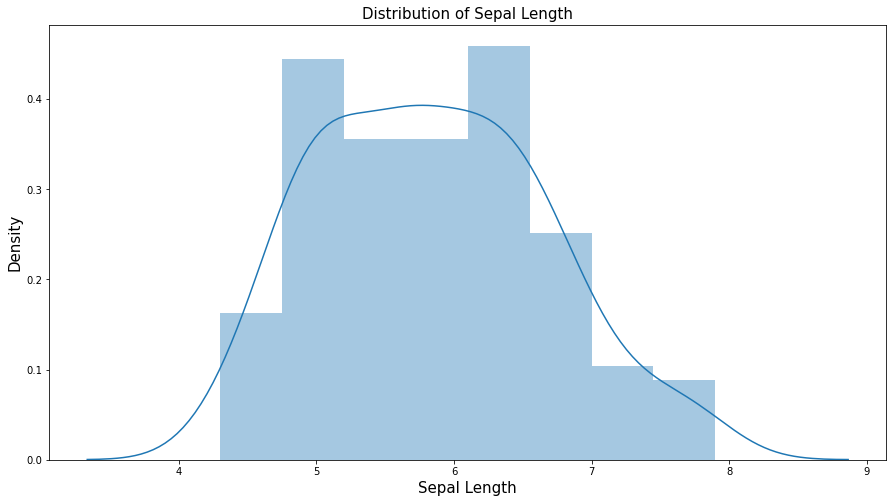

In [7]:
# set the figure size
plt.figure(figsize = (15,8))

# plot a density plot to check the skewness
sns.distplot(df_iris['sepal length'])

# add the plot and axis label
# set text size using 'fontsize'
plt.xlabel('Sepal Length', fontsize = 15)
plt.ylabel('Density', fontsize = 15)
plt.title('Distribution of Sepal Length', fontsize = 15)

# display the plot
plt.show()

From the value of skewness and the plot, we can say that the distribution is not skewed. Thus, there is no need to apply any transformation technique.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. Is it appropriate to perform the frequency encoding on flower species? Give a suitable reason for your response
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [8]:
# frequency encoding on 'class'
# size of each category
encoding = df_iris.groupby('class').size()

# get frequency of each category
encoding = encoding/len(df_iris)

# create a column
# map() maps the frequency of a class to each observation 
df_iris['class_freq'] = df_iris['class'].map(encoding)
df_iris.head()

,sepal length,sepal width,petal length,petal width,class,class_freq
0,5.1,3.5,1.4,0.2,setosa,0.333333
1,4.9,3.0,1.4,0.2,setosa,0.333333
2,4.7,3.2,1.3,0.2,setosa,0.333333
3,4.6,3.1,1.5,0.2,setosa,0.333333
4,5.0,3.6,1.4,0.2,setosa,0.333333


In [9]:
# check the unique frequencies
df_iris['class_freq'].unique()

array([0.33333333])

It is not appropriate to perform the frequency encoding on flower species; since the frequency of all the three classes is the same (= 0.33).

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5. Does the petal width range from zero to one? If not, transform the values such that they lie between 0 and 1
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [10]:
# minimum and maximum of original data
print('Maximum:', df_iris['petal width'].max())
print('Minimum:', df_iris['petal width'].min())

Maximum: 2.5
Minimum: 0.1


We can see that the range of the values of the petal width is from 0.1 to 2.5. 

The range of the values of petal width is not from 0 to 1. Thus, use the min-max normalizer to transform the values such that they lie between 0 and 1 inclusive.

In [11]:
# import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

# instantiate the MinMaxScaler
min_max = MinMaxScaler()

# fit the MinMaxScaler using 'fit_transform'
transformed_width = min_max.fit_transform(df_iris[['petal width']])

# minimum and maximum of normalized data
print('Maximum:', transformed_width.max())
print('Minimum:', transformed_width.min())

Maximum: 1.0
Minimum: 0.0


From the above output, we can see that the values of the transformed variable lie between 0 and 1 inclusive.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. Construct a boolean matrix such that it returns 'True' for correlation greater than 0.8</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [12]:
# corr() returns correlation between numeric variables
# the comparison operator returns 'True' if condition is satisfied
df_iris.corr() > 0.8

,sepal length,sepal width,petal length,petal width,class_freq
sepal length,True,False,True,True,False
sepal width,False,True,False,False,False
petal length,True,False,True,True,False
petal width,True,False,True,True,False
class_freq,False,False,False,False,True


The diagonal entries will always be 'True' as it is the correlation of a variable with itself. We can observe that the pairs (sepal length, petal length), (sepal length, petal width), and (petal length, petal width) have high a positive correlation. The value 'False' indicates that the correlation is less than or equal to 0.8

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7. Find the probability that the sepal length of a flower is less than 6 cm using a plot</b>
                </font>
            </div>
        </td>
    </tr>
</table>

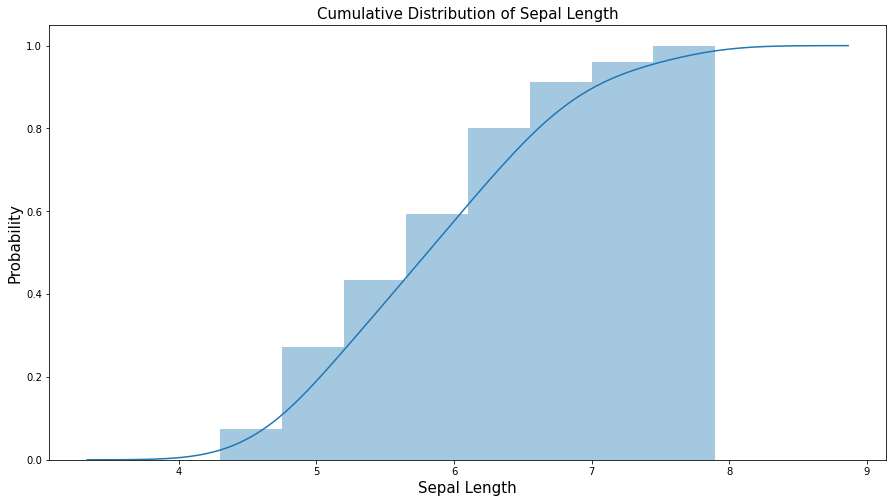

In [13]:
# set the figure size
plt.figure(figsize = (15,8))

# 'cumulative=True' returns the cumulative distribution to find the probability
sns.distplot(df_iris['sepal length'], hist_kws=dict(cumulative=True), kde_kws=dict(cumulative=True))

# add the plot and axis label
# set text size using 'fontsize'
plt.xlabel('Sepal Length', fontsize = 15)
plt.ylabel('Probability', fontsize = 15)
plt.title('Cumulative Distribution of Sepal Length', fontsize = 15)

# display the plot
plt.show()

Approximately 60% of the flowers have a sepal length of less than 6 cm.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. Label the class of each flower with the integer values from 0 to 2</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [14]:
# import the LabelEncoder
from sklearn.preprocessing import LabelEncoder

# instantiate the encoder
labelencoder = LabelEncoder()

# fit the encoder using 'fit_transform'
df_iris['LabelEncoded_class'] = labelencoder.fit_transform(df_iris['class'])

# check the unique labels 
set(df_iris['LabelEncoded_class'])

{0, 1, 2}

Three labels have been assigned to the three different species of the iris flower.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>9. What is the relationship between petal length and petal width for different flower species?
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

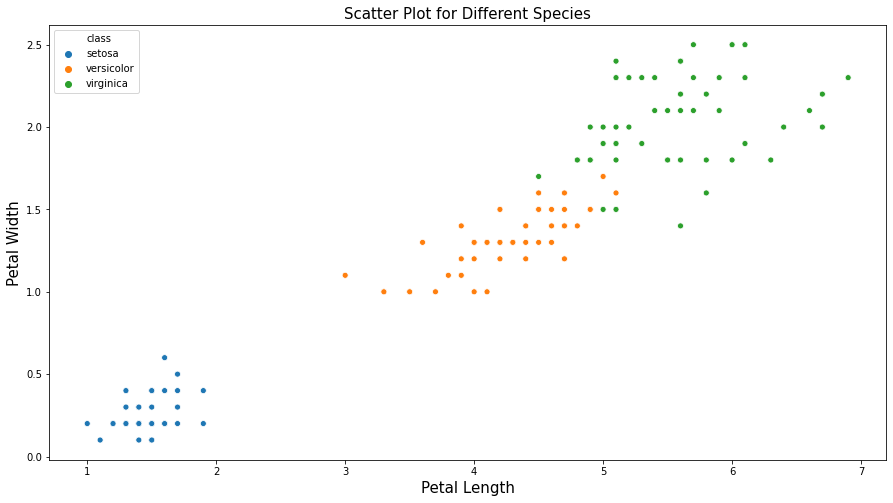

In [15]:
# set the figure size
plt.figure(figsize = (15,8))

# use 'hue' to add class variable in the scatter plot
sns.scatterplot('petal length', 'petal width', hue = 'class', data = df_iris)

# add plot and axes labels
# set text size using 'fontsize'
plt.title('Scatter Plot for Different Species', fontsize = 15)
plt.xlabel('Petal Length', fontsize = 15)
plt.ylabel('Petal Width', fontsize = 15)

# display the plot
plt.show()

The above scatter plot with hue shows that for the species 'setosa', both the petal length and petal width have smaller values as compared to the other species. 'virginica' has the highest value for both the petal length and petal width.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>10. Compare the sepal length of the three flower species
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

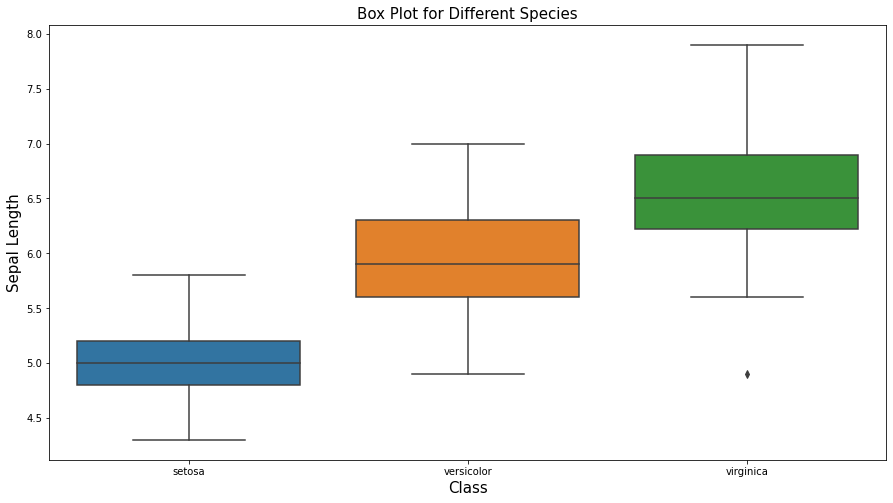

In [16]:
# set the figure size
plt.figure(figsize = (15,8))

# compare sepal length for different species
sns.boxplot(x = 'class', y = 'sepal length', data = df_iris)

# add plot and axes labels
# set text size using 'fontsize'
plt.xlabel('Class', fontsize = 15)
plt.ylabel('Sepal Length', fontsize = 15)
plt.title('Box Plot for Different Species', fontsize = 15)

# display the plot
plt.show()

The grouped boxplot shows the significant difference between the sepal lengths of all the three species. The sepal length for the species 'setosa' is smallest, while 'virginica' has the highest value for sepal length. Also, we can observe that there is an outlier for 'virginica'.